<a href="https://colab.research.google.com/github/prithviemmidi/Dissertation/blob/main/MNIST_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import datasets, models, layers
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

In [2]:
# Loading the MNIST dataset

data = tf.keras.datasets.mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Normalising the data

train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Defining the optimisers used

optimisers = {
    'MB-GD': SGD(learning_rate=0.01), # MB-GD using SGD optimizer (batch_size = 100)
    'AdaGrad': Adagrad(learning_rate=0.01,  epsilon=1e-8),
    'AdaDelta': Adadelta(learning_rate=0.01, rho=0.9, epsilon=1e-8),
    'RMSprop': RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-8),
    'Adam': Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)}

histories = {}

In [6]:
for name, opt in optimisers.items():

    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')])

    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy', # Minimising SCCE Loss Function
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels,
                        validation_split=0.2,
                        epochs=50,
                        batch_size=100)

    histories[name] = history

Epoch 1/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5601 - loss: 1.8335 - val_accuracy: 0.8868 - val_loss: 0.3776
Epoch 2/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8864 - loss: 0.3745 - val_accuracy: 0.9128 - val_loss: 0.2847
Epoch 3/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9248 - loss: 0.2469 - val_accuracy: 0.9388 - val_loss: 0.2022
Epoch 4/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9444 - loss: 0.1811 - val_accuracy: 0.9587 - val_loss: 0.1421
Epoch 5/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9570 - loss: 0.1424 - val_accuracy: 0.9663 - val_loss: 0.1138
Epoch 6/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9636 - loss: 0.1174 - val_accuracy: 0.9660 - val_loss: 0.1084
Epoch 7/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9670 - loss: 0.1080 - val_accuracy: 0.9736 - val_loss: 0.0901
Epoch 8/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.0899 - val_accuracy: 0

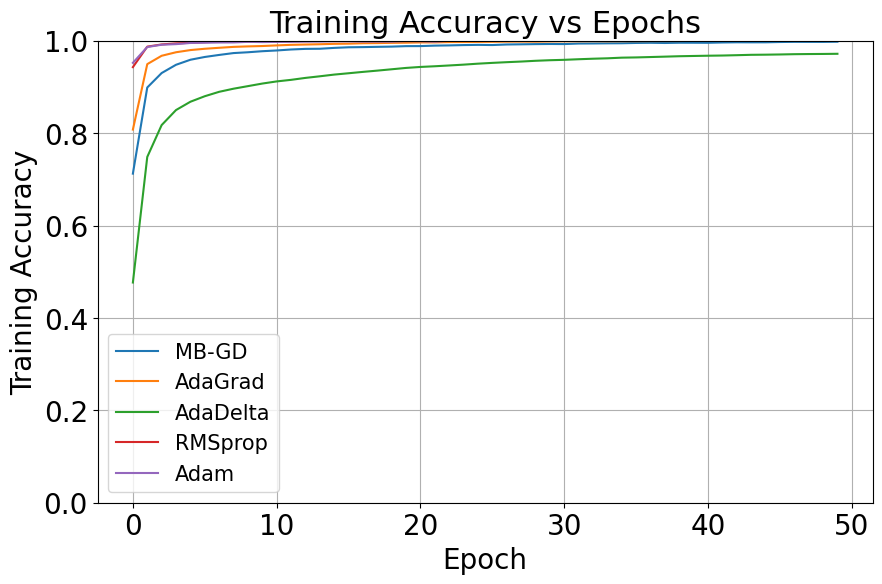

In [7]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name}')

plt.xlabel('Epoch', fontsize = 20)
plt.ylabel('Training Accuracy', fontsize = 20)
plt.title('Training Accuracy vs Epochs', fontsize = 22)
plt.legend(fontsize = 15)
plt.ylim([0, 1])
plt.grid(True)
plt.tick_params(axis='both', labelsize=20)
plt.show()

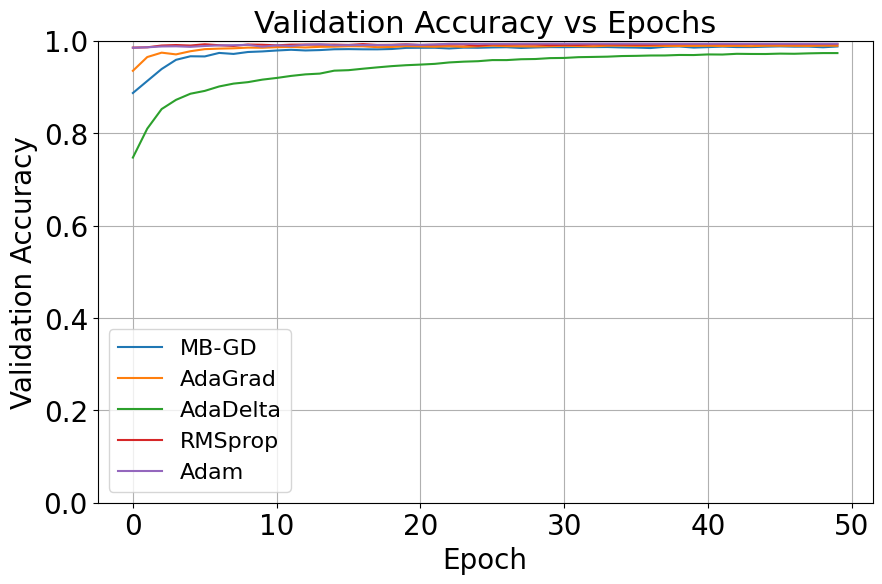

In [8]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name}')

plt.xlabel('Epoch', fontsize = 20)
plt.ylabel('Validation Accuracy', fontsize = 20)
plt.title('Validation Accuracy vs Epochs', fontsize = 22)
plt.legend(fontsize = 16)
plt.ylim([0, 1])
plt.grid(True)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

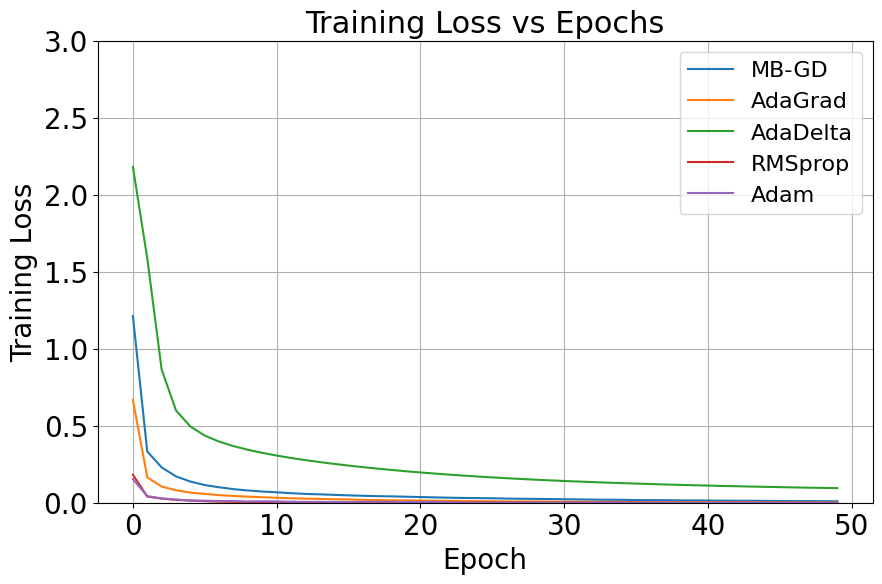

In [9]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name}')

plt.xlabel('Epoch', fontsize = 20)
plt.ylabel('Training Loss', fontsize = 20)
plt.title('Training Loss vs Epochs', fontsize = 22)
plt.ylim([0, 3])
plt.grid(True)
plt.legend(fontsize = 16)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

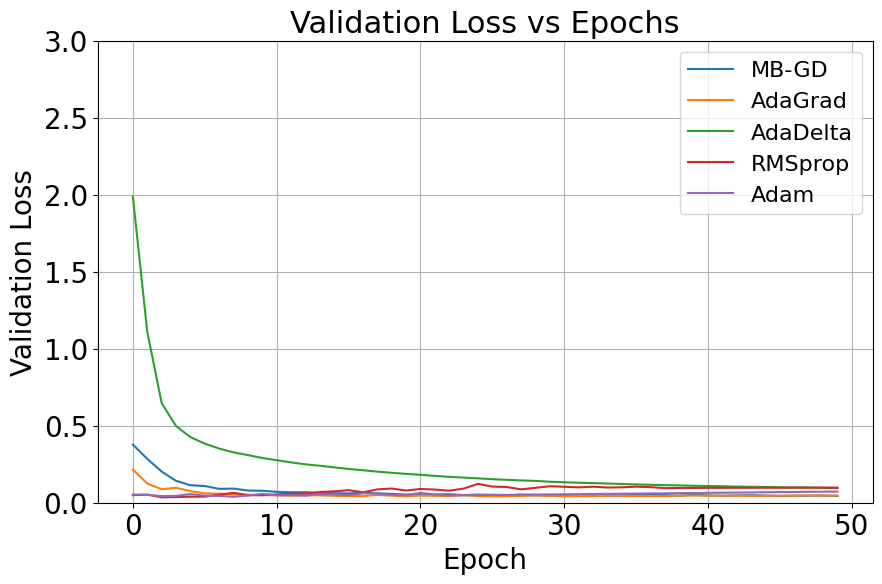

In [10]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name}')

plt.xlabel('Epoch', fontsize = 20)
plt.ylabel('Validation Loss', fontsize = 20)
plt.title('Validation Loss vs Epochs', fontsize = 22)
plt.grid(True)
plt.legend(fontsize = 16)
plt.tick_params(axis='both', labelsize = 20)
plt.ylim([0, 3])
plt.show()

Text(0, 0.5, 'Training Accuracy')

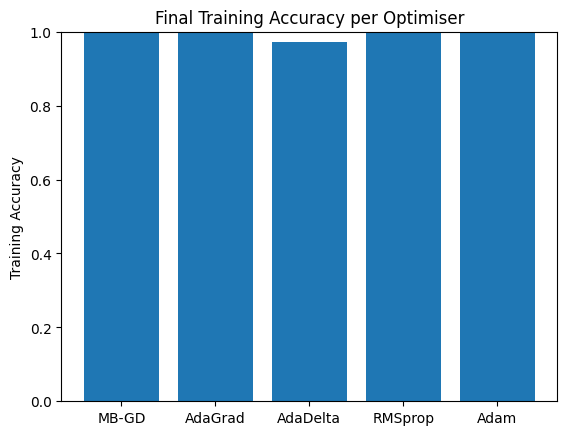

In [11]:
training_acc_bar = {name: max(history.history['accuracy']) for name, history in histories.items()}
plt.bar(training_acc_bar.keys(), training_acc_bar.values())
plt.title("Final Training Accuracy per Optimiser")
plt.ylim([0, 1])
plt.ylabel("Training Accuracy")

Text(0, 0.5, 'Validation Accuracy')

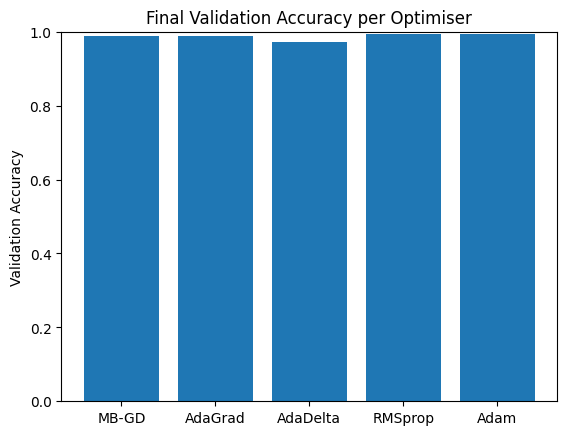

In [12]:
val_acc_bar = {name: max(history.history['val_accuracy']) for name, history in histories.items()}
plt.bar(val_acc_bar.keys(), val_acc_bar.values())
plt.title("Final Validation Accuracy per Optimiser")
plt.ylim([0, 1])
plt.ylabel("Validation Accuracy")

In [13]:
final_acc = {
    "Optimiser": [],
    "Final Training Accuracy": [],
    "Final Validation Accuracy": []}

for name, history in histories.items():
    final_acc["Optimiser"].append(name)
    final_acc["Final Training Accuracy"].append(history.history["accuracy"][-1])
    final_acc["Final Validation Accuracy"].append(history.history["val_accuracy"][-1])

df = pd.DataFrame(final_acc)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Final Training Accuracy  Final Validation Accuracy
    MB-GD                   0.9979                     0.9876
  AdaGrad                   0.9999                     0.9891
 AdaDelta                   0.9717                     0.9732
  RMSprop                   1.0000                     0.9926
     Adam                   1.0000                     0.9936


In [14]:
final_loss = {
    "Optimiser": [],
    "Final Training Loss": [],
    "Final Validation Loss": []}

for name, history in histories.items():
    final_loss["Optimiser"].append(name)
    final_loss["Final Training Loss"].append(history.history["loss"][-1])
    final_loss["Final Validation Loss"].append(history.history["val_loss"][-1])

df = pd.DataFrame(final_loss)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Final Training Loss  Final Validation Loss
    MB-GD               0.0093                 0.0440
  AdaGrad               0.0015                 0.0467
 AdaDelta               0.0946                 0.0946
  RMSprop               0.0000                 0.0981
     Adam               0.0000                 0.0726


In [15]:
best_train_acc = {"Optimiser": [], "Best Training Accuracy": []}
for name, history in histories.items():
    best_train_acc["Optimiser"].append(name)
    best_train_acc["Best Training Accuracy"].append(max(history.history["accuracy"]))

df = pd.DataFrame(best_train_acc)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Best Training Accuracy
    MB-GD                  0.9979
  AdaGrad                  0.9999
 AdaDelta                  0.9717
  RMSprop                  1.0000
     Adam                  1.0000


In [16]:
best_val_acc = {"Optimiser": [], "Best Validation Accuracy": []}
for name, history in histories.items():
    best_val_acc["Optimiser"].append(name)
    best_val_acc["Best Validation Accuracy"].append(max(history.history["val_accuracy"]))

df = pd.DataFrame(best_val_acc)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Best Validation Accuracy
    MB-GD                    0.9877
  AdaGrad                    0.9893
 AdaDelta                    0.9732
  RMSprop                    0.9928
     Adam                    0.9937
